## Ocena 6

Za oceno 6 bo potrebno pokazati, da znamo brati datoteke csv ter delati z nizi in slovarji.

-----------

### `osebe.csv`

- V datoteki osebe.csv se nahajajo polna imena vseh oseb iz Harryja Potterja (žal tudi iz kasnejših "dodatkov") in povezave na strani s podatki o njih na Wikidata. Preberite podatke iz datoteke in jih shranite v slovar z imenom `osebe`: ključi naj bodo polna imena oseb, pripadajoče vrednosti pa povezave. (Torej: drugi stolpec so ključi, prvi stolpec so vrednosti.)

    Program naj ne bo napisan za to specifično vsebino datoteke! Če spremenimo vsebino datoteke, tako da vsebuje osebe iz romana Vojna in mir, mora pač sestaviti slovar teh oseb. Računajte pa, da bo datoteki vedno ime osebe.csv.

	**Pomembno:** datoteka je v istem direktoriju kot programi in program naj datoteko odpre z `open("osebe.csv")`, brez imen direktorijev! Nobenih `open("c:\Users\janez\programiranje\naloga11\oseba.csv")`!

#### Rešitev

Najbolj premočrtna rešitev je `DictReader`.

In [1]:
import csv

osebe = {}
for vrstica in csv.DictReader(open("osebe.csv", encoding="utf-8")):
    osebe[vrstica["itemLabel"]] = vrstica["item"]

Kdor ne mara `DictReader`-ja in bi rad uporabil običajni `csv.reader`, se bo moral znebiti prve vrstice datoteke, tako da jo prebere (in zavrže) z `readline`.

In [2]:
import csv

f = open("osebe.csv", encoding="utf-8")
f.readline()
for url, ime in csv.reader(f):
    osebe[ime] = url

Kdor sploh ne mara `csv`, bo vse naredil sam:

In [3]:
osebe = {}
f = open("osebe.csv", encoding="utf-8")
f.readline()
for vrstica in f:
    url, ime = vrstica.strip().split(",")
    osebe[ime] = url

Sam imam čisto rad csv, a kadar je datoteka tako preprosta, je skoraj lažje brez njega.

In [4]:
with open("osebe.csv", encoding="utf-8") as f:
    f.readline()
    osebe = {ime: id for id, ime in (vrstica.strip().split(",") for vrstica in f)}

Mimogrede: tule odpremo datoteko čisto po pravilih. Tudi zgoraj bi jo lahko tako kot tu (ali tu tako kot zgoraj).

### `brez_dodatkov(ime)`

- Napišite funkcijo `brez_dodatkov(ime)`, ki prejme polno ime osebe in vrne ime te osebe brez "dodatkov". Klic `brez_dodatkov("Mrs. Molly Weasley")` vrne `"Molly Weasley"`, klic `brez_dodatkov("Cygnus Black III")` vrne `"Cygnus Blake"` in klic `brez_dodatkov("Madame Rolanda Hooch")` vrne `"Rolanda Hooch"`. Dodatki, ki jih morate odstraniti, so `'Mr. ', 'Mrs. ', ' III', ' II', ' I', 'the ', 'The ', ' Jr.', 'Sir ', 'Madam ', 'Madame '`. (V seznamu sem prijazno dodal presledke pred ali za "dodatek"; to bi vam lahko pomagalo, če vam ne, pa jih pobrišite.)

    **Pazi:** `"Sirius Black III"` mora postati `"Sirius Black"`, ne `"ius Black"`!

#### Rešitev

Tale naloga ni nič posebnega, tu je bolj zato, da si pripravimo imena za nadaljevanje. No, po drugi strani tudi ni nič narobe, če malo pomislimo in povedimo.

In [5]:
def brez_dodatkov(s):
    dodatki = ["Mr. ", "Mrs. ", " III", " II", " I", "the ", " Jr.", "Sir ", "Madam ", "Madame "]
    for dodatek in dodatki:
        s = s.replace(dodatek, "")
    return s

Pazite na presledke: presledek večinoma sledi dodatku (recimo pri `"Mr. "`), včasih pa je pred njim (pri `" III"`).

Bolj vešči napišejo tole:

In [6]:
def brez_dodatkov(s):
    dodatki = ["Mr. ", "Mrs. ", " III", " II", " I", "the ", " Jr.", "Sir ", "Madam ", "Madame "]
    return reduce(lambda acc, x: acc.replace(x, ""), dodatki, s)

Tega se nismo učili, samo povem, da se da.

Sam se izognil še pisanju narekovajev in vejic ter naredil tako:

In [7]:
def brez_dodatkov(s):
    return reduce(lambda acc, x: acc.replace(x, ""),
                  "Mr. -Mrs. - III- II- I-the - Jr.-Sir -Madam -Madame ".split("-"),
                  s)

### `po_priimkih()`

- Napišite funkcijo `po_priimkih()`, ki vrne slovar, katerega ključi so priimki oseb, imena pa (prva) množice imen oseb s takšnim priimkom. Pri tem moraš iz imena pobrisati "dodatke" - kot je opisano zgoraj.

    - Če je za osebo znano le eno ime (Kreacher, Nagini), brez priimka, naj se ne pojavi v slovarju.
	- Če ima oseba več imen, je priimek zadnji, ime pa je prvo. V `"Albus Percival Wulfric Brian Dumbledore"` je priimek Dumbledore, ime pa Albus.

	V slovarju, ki ga vrne `po_priimkih`, je pri ključu `"Dumbledore"` vrednost `{'Albus', 'Ariana', 'Percival', 'Kendra', 'Aberforth'}`.

#### Rešitev

Da se izognemo preverjanju, ali smo določen priimek že srečali ali ne, bomo uporabili `defaultdict`. Ostalo gre točno po navodilih: vzamemo imena in priimke, odstranimo dodatke, razdelimo na deli. Če sta dela vsaj dva, je ničti element ime, zadnji pa priimek. Dodamo ju v slovar, kot pravi naloga.

In [8]:
from collections import defaultdict

def po_priimkih():
    priimki = defaultdict(set)
    for imena_in_priimek in osebe:
        deli = brez_dodatkov(imena_in_priimek).split()
        if len(deli) >= 2:
            ime, priimek = deli[0], deli[-1]
            priimki[priimek].add(ime)
    return priimki

Kozmetična sprememba, ki bi jo naredil veteran: `ime, *_, priimek = deli`. Naj razume, kdor hoče.

### `je_stevilka_poglavja(vrstica)`

V datoteki potter6.txt je besedilo šestega dela knjige Harry Potter. (V izobraževalne namene in v ne preveč lepo berljivi obliki).

- Napišite funkcijo `je_stevilka_poglavja(vrstica)`, ki prejme vrstico iz datoteke in vrne `True`, če gre za vrstico s številko poglavja. Le-te so videti tako: `— CHAPTER TWENTY-ONE —`, le številka je vsakič druga.

    **Pazi:** `—` ni običajen minus. Skopiraj znak iz datoteke.

#### Rešitev

Tule ni kaj. Funkcija samo zato, ker jo potrebujemo.

In [9]:
def je_stevilka_poglavja(vrstica):
    return vrstica.startswith("— CHAPTER")

#### `naslovi_poglavij(ime_datoteka)`

- Vrstici s številko poglavja vedno sledi vrstica, ki vsebuje ime poglavja. Napiši funkcijo `naslovi_poglavij(ime_datoteke)`, ki prejme ime datoteke z besedilom (tako, da je reč uporabna tudi za druge knjige Harryja Potterja...) in vrne seznam imen poglavij. Seznam se začne z `['The Other Minister', 'Spinner’s End', 'Will and Won’t', 'Horace Slughorn', `...

#### Rešitev

Če ne vemo za `pairwise`, moramo narediti nekaj v tem slogu:

In [10]:
def naslovi_poglavij(ime_datoteke):
    naslovi = []
    sledi_naslov = False
    for vrstica in open(ime_datoteke, encoding="utf-8"):
        if sledi_naslov:
            naslovi.append(vrstica.strip())
        sledi_naslov = je_stevilka_poglavja(vrstica)
    return naslovi

Za vsako vrstico moramo vedeti, ali je *prejšnja* vrstica napovedala naslov poglavja.

Če uporabimo `pairwise`, nam je v vsakem krogu zanke dostopna tudi prejšnja vrstica.

In [11]:
def naslovi_poglavij(ime_datoteke):
    naslovi = []
    for prejsnja, vrstica in pairwise(open(ime_datoteke, encoding="utf-8")):
        if je_stevilka_poglavja(prejsnja):
            naslovi.append(vrstica.strip())
    return naslovi

Takole pa naredimo z generatorjem.

In [12]:
def naslovi_poglavij(ime_datoteke):
    return [naslednja.strip()
            for prejsnja, naslednja in pairwise(open(ime_datoteke, encoding="utf-8"))
            if je_stevilka_poglavja(prejsnja)]

## Ocena 7

Za oceno 7 se ne bo potrebno pretegniti: samo še malo bomo delali z nizi.

-----------

V besedilu se nahajajo

- številke poglavij: zazna jih funkcija `je_stevilka_poglavja`, ki jo že imamo
- naslovi poglavij: to so vrstice takoj za vrstico s številko poglavja
- številke strani: te se začnejo ali končajo s številko, in vse besedilo je napisano s SAMIMI VELIKIMI ČRKAMI.

    Primera vrstice s številko strani sta `" WILL AND WON'T 11` in `"44 HARRY POTTER"`.

	Vrstici `SCRIMGEOUR SUCCEEDS FUDGE` in `"5 miles’. The "` nista vrstici s številko. Prva nima številke, druga ni zapisana s samimi veliki črkami.

Napiši funkcijo `besedilo(ime_datoteke)`, ki prebere besedilo iz datoteke in ga vrne kot niz, ki vsebuje *samo besedilo*, brez številk in naslovov poglavij ter številk strani.

Za lažje testiranje bodo testi uporabljali izvleček besedila, potter6-zacetek.txt.

#### Rešitev

In [13]:
def besedilo(ime_datoteke):
    tekst = ""
    prej_poglavje = False
    for vrstica in open(ime_datoteke, encoding="utf-8"):
        if je_stevilka_poglavja(vrstica):
            prej_poglavje = True
            continue
        deli = vrstica.split()
        if (not prej_poglavje
                and (set(vrstica) & set("abcdefghijklmnopqrstuvwxyz")
                     or not (deli[0].isdigit() or deli[-1].isdigit()))
        ):
            tekst += vrstica
        prej_poglavje = False
    return tekst

Spremenljivka `prej_poglavje` pove, ali je prejšnja vrstica vsebovala številko poglavja. V tem primeru je trenutna vrstica naslov poglavja in jo je potrebno izpustiti. Poleg tega izpustimo vrstico, ki ne vsebuje nobene male črke (zahtevamo, da mora biti presek njenih znakov z množico malih črk "resničen", torej neprazen) in vrstico, v kateri je prva ali zadnja beseda sestavljena iz samih števk.

Pogoj bi se dalo oblikovati tudi kako drugače in bi dal enak rezultat.

## Ocena 8

Za oceno 8 bo potrebno brati json s spleta in ga razvozlati. Programiranja ne bo veliko, poudarek bo na tem, da znamo razumeti podatke, ki jih dobimo.

-----

Podatke o osebah sem pridobil s fantastičnega vira, ki ima podatke o vsem na svetu - s Wikidata, ki je, v bistvu, Wikipedia v strojno berljivi obliki. Z njim je žal nekoliko nerodno delati. V domači nalogi boste okusili nekoliko tega. (Tema domače naloge so sicer osebe iz otroške literature; podobne reči bi lahko delali tudi z resnimi podatki!)

V brskalnik vnesite kakega izmed URL-jev v datoteki osebe.csv (lahko recimo, kliknete na tole: [http://www.wikidata.org/entity/Q712548](http://www.wikidata.org/entity/Q712548)). Dobili boste stran iz podatkovne baze, ki vsebuje podatke o imenu te osebe v različnih jezikih, njegovih sorodnikih, spolu, datumu in kraju smrti... V nalogi za oceno 8 boste brali te podatke.

Opazite lahko, da vas je brskalnik preusmeril s strani, ki ste jo vpisali, npr. `http://www.wikidata.org/entity/Q712548` na stran, ki pokaže podatke v človeku berljivi obliki `https://www.wikidata.org/wiki/Q712548`. Za začetek poberite vsebino strani `http://www.wikidata.org/entity/Q712548` v Pythonu, tako kot smo se učili na predavanju. Ker gre za json, ga ustrezno dekodirajte, kot smo se tudi učili.

Videli boste, da ste dobili nek grozljiv slovar. Recimo, da ga shranite v spremenljivko z imenom `podatki`. Da ga lahko preberete, poskusite tole:

```python
import pprint
pprint.pp(podatki)
```

Najprej nekaj o Wikidata. Vsaka stvar ("entiteta") ima "identifier". Q712548 je identifier Albusa Dumbledora, Q437 je mesto Ljubljana, Q34660 je J. K. Rowling, Q11518 je Pitagorov izrek. Kdo ali kaj je Q42, uganite.

Vsaka entiteta je opisana z lastnostmi (property). P1559 je full name -- pač za stvari, ki imajo full name; osebe ga imajo, Pitagorov izrek pač ne. P569 je dan rojstva, P21 je spol, P37 je uradni jezik, P625 so zemljepisne koordinate (Ljubljane, ne Pitagorovega izreka ali Albusa Dumbledora).

Pridobljeni slovar bo imel vedno en sem ključ `entities`; pripadajoča vrednost bo imela en sam ključ, namreč oznako entitete (na primer `Q712548`). Podatki so znotraj tega. Preglejte in se znajdite.

Najbolj zanimive stvari so znotraj `claims`. Ključi so lastnosti, vrednosti pa so ... te lastnosti zapisani v obliki, ki jo boste videli iz `pprint`-a.

### `datum_rojstva_q(identifier)`, `datum_rojstva(ime)`

- Napiši funkcijo `datum_rojstva_q(identifier)`, ki prejme oznako osebe in vrne terko z letom, mesecem in dnevom, na katerega je bila rojena ta oseba.

    Klic `datum_rojstva_q("Q34660")` vrne `(1965, 7, 31)`, ker je bila J. K. Rowling rojena 31. julija 1965.

    Klic `datum_rojstva_q("Q1031")` vrne `(1800, 12, 3)`, ko je bil rojen pesnik.

    **Pomoč:** poišči funkcijo `strptime` in poglej dokumentacijo. Datum na Wikidata je v obliki `"+%Y-%m-%dT%H:%M:%SZ"`.

- Napiši funkcijo `datum_rojstva(ime)`, ki prejme ime osebe iz Harryja Potterja in vrne datum rojstva te fiktivne osebe.

    Klic `datum_rojstva("Harry Potter")` vrne `(1980, 7, 31)`, ker je bil Harry Potter rojen 31. julija 1980.

  
#### Rešitev

Obe funkciji bosta morali na koncu koncev prebrati podatke z določenega URL. Rešimo ju hkrati: napišimo pomožno funkcijo, ki prebere podatke s tega URL-ja; obe funkciji, ki ju moramo napisati, bosta nato le klicali to, pomožno funkcijo.

In [14]:
def datum_rojstva_url(url):
    identifier = url.split("/")[-1]
    data = json.load(urlopen(url))
    date = data["entities"][identifier]["claims"]["P569"][0]["mainsnak"]["datavalue"]["value"]["time"]
    date = strptime(date, "+%Y-%m-%dT%H:%M:%SZ")
    return date.tm_year, date.tm_mon, date.tm_mday


def datum_rojstva_q(identifier):
    return datum_rojstva_url(f"http://www.wikidata.org/entity/{identifier}")


def datum_rojstva(ime):
    return datum_rojstva_url(osebe[ime])


Pomožna funkcija je dokaj preprosta: pokličemo `urlopen` s podanim `url` in rezultat damo `json.load`, da vrne slovar, ki ga dobimo s te strani. Če si ga ogledamo, vidimo, da bo iskani datum pod ključem `"entities"`, znotraj tega bo "identifier", ki ga dobimo kot zadnji del URL-ja, znotraj tega bo `"claims"` ... in tako naprej. Kup slovarjev v slovarjih v slovarjih. V resničnem svetu se bomo pogosto znašli v situaciji, ko bomo dobili podatke v obliki, ki jo bomo morali sami dekodirati (ali pa se prebijati čez dokumentacijo, ki bo ažurna ali pa tudi ne, zelo pogosta pa bo tudi doooolga). Datum bo imel obliko `"+%Y-%m-%dT%H:%M:%S"`. Razkopljemo ga s `strptime` in vrnemo, kar zahteva naloga.

Zdaj `datum_rojstva_q` sestavi URL na podlagi podanega "identifierja", `datum_rojstva` pa za podano osebo dobi kar URL iz slovarja `osebe`.

### `prevod_imena(ime)`

- Napiši funkcijo `prevod_imena(ime)`, ki bo za podano ime povedal, kaj je iz tega imena naredil slovenski prevajalec. Klic `prevod_imena("Severus Snape")` vrne "Robaus Raws".

  (Rant: slovenskega prevoda nisem bral. Pogled na Wikipedijo pa pokaže, da se je izgleda samo slovenskemu in madžarskem prevajalcu zdelo potrebno zamenjati originalna imena z nekimi svojimi slaboumotvori.)

#### Rešitev

Čisto podobno kot prej, le drugo reč je potrebno prebrati iz slovarja.

In [15]:
def prevod_imena(ime):
    data = json.load(urlopen(osebe[ime]))
    return data.popitem()[1].popitem()[1]["labels"]["sl"]["value"]

### Posebni `urlopen`

Da bo vaš program tekel hitreje, je testom priložena moja funkcija `urlopen`. Namesto da bi uvažali `urlopen` iz `urllib.request`, temveč kličite to, mojo funkcijo. Ta bo brala vnaprej pobrane podatke iz priložene datoteke osebe.json, pravo funkcijo `urlopen` pa poklicala le za podatke, ki jih ni v datoteki.

Tudi v praksi ravnajte tako: če iz spletne strani pobirate neke podatke, jih poberite enkrat za vselej in shranjujte lokalno. To ne bo le hitrejše, temveč tudi prijaznejše do spletne strani.

## Ocena 9

Naloga za oceno 9 nas bo še malo vadila v igranju s slovarji, množicami in nizi. Predvsem bo treba razmisliti, kako se lotiti dela, da stvari ne bodo prepočasne.

---------------

### `po_imenih()`

Najprej bomo zamenjali imena in priimke vseh oseb z njihovimi imeni. V knjigi ima namreč veliko oseb lahko isti priimek, imena pa so (skoraj) unikatna. Napisati bo potrebno funkcijo, ki takole spreminja besedila.

- `po_imenih("Harry, Ron and Ginny Weasley, and also Dursley, Ollivander and Rosmerta walk'd down the corridor.")` vrne `"Harry Ron and Ginny and also Vernon Garrick and Rosmerta walk'd down the corridor"`
            ,
- `po_imenih("Whether you call him Albus Dumbledore, or Albus Percival Wulfric Brian Dumbledore, or just Dumbledore, he was a great wizard.")` vrne `"Whether you call him Albus or Albus or just Albus he was a great wizard"`

- `po_imenih("Dumbledore was a brother of Aberforth Dumbledore and Ariana.")` vrne `"Albus was a brother of Aberforth and Ariana"`

- `po_imenih("The Potters and the Dursleys were neighbours.")` vrne isto besedilo, le brez pike na koncu.

- `po_imenih("Justin Finch-Fletchley said: 'Don't talk to me like this - Potter!'")` vrne `"Justin said Don't talk to me like this Harry"`

    Tudi rezultat klica z `"Finch-Fletchley said: 'Don't talk to me like this - Potter!'"` in `"Finch-Fletchley said: 'Don't talk to me like this - Potter!'"`

Funkcija mora izvesti naslednje operacije:

- V besedilu mora ohraniti le besede. Besede so zaporedja, ki vsebujejo vsaj eno črko, poleg tega pa lahko vsebujejo znaka `-` in `'`, ki pa se morata pojaviti znotraj besede. **S tem se ne zafrkavaj sam(a)**: testom je priložena funkcija `samo_besede(s)`, ki prejme besedilo in vrne niz, ki vsebuje le besede. Samo pokliči jo.
- V besedilu zamenja vse pojavitve imena in priimka z imenom. "Harry Potter" zamenja s "Harry", "Ginny Weasley" z "Ginny". Če ima oseba več imen, zamenja popolno različico in različico z enim samim imenom: "Albus Dumbledore" zamenja z "Albus", pa tudi "Albus Percival Wulfric Brian Dumbledore" zamenja z "Albus".
- Nato (in šele nato!) zamenja vse priimke z imeni. "Potter" zamenja s "Harry", "Weasley" zamenja z "Ron", "Dumbledore" zamenja z "Albus". Kadar je priimek unikaten, je stvar jasna: "Granger" je lahko samo "Hermione". Kadar ima isti priimek več oseb, pa **slovar `primarna`, ki je priložen testom**, pove, katero ime je potrebno uporabiti: ključi slovarja so priimki, vrednosti pa "privzeto ime" za ta priimek. (Izbira je seveda moja, po občutku; Dursley je ponavadi Vernon in ne Dudley, recimo.)

**Pomemben namig:** Uporabljaj `replace`! Če boš delal zanko čez besede, bo funkcija veliko prepočasna, saj je besed 932130.

**Malo zavozlan namig:** tako besedilu kot temu, kar zamenjuješ kot temu, s čimer zamenjuješ, na začetek in konec prištej presledek. Tako se izogneš nevarnosti, da zamenjaš del besede.

#### Rešitev

Za to funkcijo mi je žal. Hotel sem, da bi bila domača naloga smiselna in odražala neko realno situacijo - v tem primeru iz računalniške analize nekega besedila. (Če kdo ugovarja, da je to bolj relevantno za, uh, na primer študente digitalnega jezikoslovja, ne pa upravne informatike in kaj šele multimedije: gre za delo z "nestrukturiranimi podatki" in jaz se profesionalno ne ukvarjam z ničemer podobnim, pa moram velikokrat početi kaj podobnega. Sploh pa so bile prejšnje naloge vseeno bolj vaje iz množic in slovarjev in datotek, ne iz obdelave besedil.)

Kakorkoli: polomil sem ga. Ta del domače naloge je bil težak iz napačnih razlogov. Težko je definirati, kaj točno naj počne takšna funkcija. V retrospektivi bi bilo boljše, če bi vam to funkcijo preprosto podal, pa gremo naprej.

Jaz sem jo rešil tako:

In [16]:
def po_imenih(besedilo):
    besedilo = " " + samo_besede(besedilo) + " "
    
    for imena_in_priimek in osebe:
        ime = brez_dodatkov(imena_in_priimek).split()[0]
        besedilo = besedilo.replace(f" {imena_in_priimek} ", f" {ime} ")
        if imena_in_priimek.count(" ") > 1:
            priimek = imena_in_priimek.split()[-1]
            besedilo = besedilo.replace(f" {ime} {priimek} ", f" {ime} ")
            
    for priimek, imena in po_priimkih().items():
        ime = primarna.get(priimek, imena.pop())
        b = None
        while b != besedilo:
            b = besedilo
            besedilo = besedilo.replace(f" {priimek} ", f" {ime} ")
            
    return besedilo[1:-1]

Prva vrstica doda na začetek in konec presledek, zadnja ju spet pobriše. Zakaj? Zato da lahko zamenjujemo besede, pred katerimi in za katerimi je presledek. Tako poskrbimo, da se Changing ne bo zamenjal v Choing, ko bi preimenovali Chang v Cho. Če hočemo, da je pred in za vsakim imenom presledek, moramo presledek za vsak slučaj dodati še na čisti začetek in konec besedila.

Prvi del zamenjuje celotna imena in priimke: gre čez vse osebe, vsako ime olušči dodatkov. Nato zamenja vse pojatitve celotnega imena in priimka z imenom. Poleg tega preveri, ali ime in priimek vsebujeta več kot en presledek - kar pomeni, da ima oseba več kot eno ime. V tem primeru zamenja, kot pravijo navodila, še različico z enim samim (prvim) imenom.

Drugi del zamenjuje priimke z imeni. Za vsak priimek (ki ga dobi v tabeli `po_priimkih`, poišče pripadajoče ime v tabeli `primarna`. Ker se v tej tabeli ne pojavijo vsi priimki, uporabimo `get`, kot privzeto vrednost pa podamo "*poljubno*" ime iz množice imen, ki pripadajo temu priimku. Beseda "poljubno" je pod narekovaji, ker bo množica v tem primeru dejansko vsebovala eno samo ime. Ker pa gre za množico, ne moremo reči kar `imena[0]`, saj množic ni možno indeksirati. Pač pa nam `pop` vrne *nek* element množice; če je le eden, potem vrne pač tega enega in edinega.

Sledi zanka, v kateri izvajamo en in isti `replace`, dokler ta karkoli spremeni. To storimo zaradi situacij, v katerih se dvakrat zapored pojavi isto ime. Niz `"Come here, Potter. Potter quickly came."` bi se spremenil v "Come here Potter Potter quickly came". Če zamenjamo `" Potter "` s ` Harry `, se bo zamenjal le prvi Potter. Do tega pride zato, ker menjamo Potter skupaj s presledkom pred in za njim; obe pojavitvi Potterja si delita presledek, zato zamenja le enega.

Grdo, a kaj hočemo. Alternativa bi bila uporabljati regularne izraze (kot so storili nekateri študenti) ali spremeniti enojne presledke v dvojne, pa potem na koncu funkcije zamenjati dvojne presledke nazaj z enojnimi.

Packarija, v vsakem primeru.

### `omembe(ime, besedilo)`

- Poleg tega napiši še funkcijo `omembe(ime, besedilo)` vrne indekse mest, na katerih se pojavi podano ime v besedilu, kakršnega vrne funkcija `po_imenih`.

    Vzemimo niz `s = "Albus Dumbledore saw how Potter walked away with Ron Weasley, and Harry was saying something")`. Funkcija `po_imenih(s)` bi zanj vrnila `"Albus saw how Harry walked away with Ron and Harry was saying something"`. Zato klic `omembe("Albus", s)` vrne `[0]`, klic `omembe("Harry", s)` vrne `[6, 12]`, klic `omembe("Ron", s)` vrne `[10]`.

    Očitno bo tvoja funkcija najprej poklicala funkcijo `po_imenih`...

#### Rešitev

V primerjavi s prejšnjo je ta trivialna. Potrebna je zaradi nadaljevanja v oceni 10.

Naredimo lahko tako:

In [17]:
def omembe(ime, besedilo):
    indeksi = []
    for i, beseda in enumerate(po_imenih(besedilo).split()):
        if beseda == ime:
            indeksi.append(i)
    return indeksi

Ali krajše:

In [18]:
def omembe(ime, besedilo):
    return [i for i, beseda in enumerate(po_imenih(besedilo).split()) if beseda == ime]

## Ocena 10

Za oceno 10 pa še malo numpyja.

------

- Napiši funkcijo `po_blokih(imena, besedilo, velikost_bloka)`, ki prejme seznam imen, besedilo knjige (npr. celotno vsebino datoteke potter6) in velikost bloka.

Besedilo obravnavamo v obliki, v kakršnega ga spremeni funkcija `po_imenih` (vsebuje samo osebe, vse osebe so predstavljene samo z imeni). Besedilo gledamo v blokih, ki vsebujejo toliko besed, kot določa `velikost_bloka`. Če je `velikost_bloka` enaka 10000, gledamo po 10000 besed skupaj. Če zadnji blok ni poln (in najbrž ni), ga ignoriramo.

Funkcija vrne `numpy`-jevo tabelo, ki ima toliko vrstic, kolikor je blokov in toliko stolpcev, kolikor je imen. Element na mestu [i, j] pove, kolikokrat se j-to ime pojavi v i-tem bloku.

V teste je dodana koda, ki bo, če imaš matplotlib in vse drugo, kar je treba, izrisala toplotni zemljevid pojavitev.

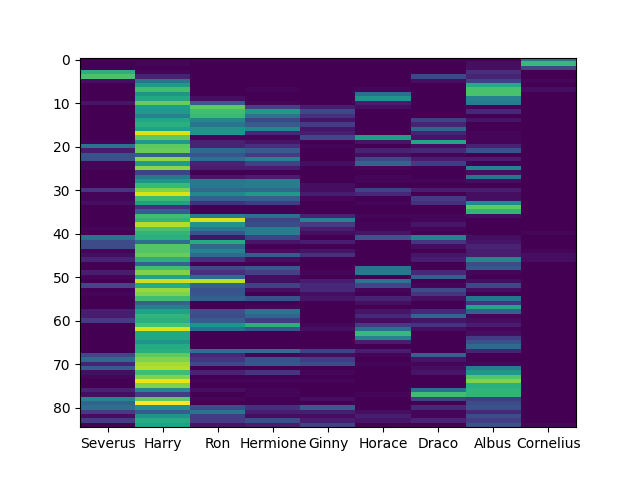

Bralci naj se spomnijo poteka zgodbe...

#### Rešitev

In [19]:
import numpy as np

def po_blokih(imena, besedilo, blok):
    besede = po_imenih(besedilo).split()
    blokov = len(besede) // blok
    pojavitve = np.zeros((blokov, len(imena)), dtype=int)
    for i in range(blokov):
        v_bloku = besede[i * blok:(i + 1) * blok]
        for ii, ime in enumerate(imena):
            pojavitve[i, ii] = v_bloku.count(ime)
    return pojavitve

- Pripravimo *seznam* besed iz besedila, v katerem zamenjamo priimke z imeni.
- Preštejemo, koliko blokov imamo, tako da število besed celoštevilsko delimo z velikostjo bloka.
- Pripravimo tabelo, ki jo bomo vrnili. Ta ima toliko vrstic, kolikor je blokov in toliko stolpcev, kolikor je imen; vsebina bodo `int`-i.
- Potem pa gremo čez vse bloke in znotraj vsakega bloka čez vsa imena. V ustrezen element tabele zapišemo število pojavitev imena v bloku.

Zanimivosti:
- besede v bloku dobimo z `besede[i * blok:(i + 1) * blok]`, kjer je `i` številka bloka.
- Besede iz bloka shranimo v `v_bloku`. To ni čisto nujno, lahko bi pisali tudi `pojavitve[i, ii] = besede[i * blok:(i + 1) * blok].count(ime)`. To bi bilo počasnejše. Poznalo bi se predvsem, če bi imeli veliko imen in dolge bloke, saj se na ta način vsakič znova sestavlja seznam imen v bloku. V tej konkretni nalogi je razlika minimalna.
- Prva zanka teče do `range(blokov)`, druga čez `enumerate(imena)`, saj v drugem primeru potrebujemo ime in indeks tega imena, ki ga uporabimo kot indeks stolpca.

Če je imen veliko, bi lahko prešteli frekvence vseh besed in potem pogledali, kolikokrat se pojavijo tiste, ki predstavljajo imena.

In [20]:
from collections import Counter

def po_blokih(imena, besedilo, blok):
    besede = po_imenih(besedilo).split()
    blokov = len(besede) // blok
    pojavitve = np.zeros((blokov, len(imena)), dtype=int)
    for i in range(blokov):
        frekvence = Counter(besede[i * blok:(i + 1) * blok])
        for ii, ime in enumerate(imena):
            pojavitve[i, ii] = frekvence.get(ime, 0)
    return pojavitve

To je malenkost - ampak res samo malenkost - hitrejše. Razlika bi postala večja, če bi bilo imen več in bloki daljši.

Je možno stvar rešiti "bolj v numpyju"? Da. 

In [21]:
def po_blokih(imena, besedilo, blok):
    besedilo = po_imenih(besedilo).split()
    blokov = len(besedilo) // blok
    besedilo = " ".join(besedilo[:blokov * blok])

    pojavitve = np.zeros((blokov, len(imena)), dtype=int)
    for i, ime in enumerate(imena):
        indeksi = np.array(omembe(ime, besedilo))
        omenjen = np.zeros(blok * blokov, dtype=bool)
        omenjen[indeksi] = True
        pojavitve[:, i] = omenjen.reshape(blokov, blok).sum(axis=1)
    return pojavitve

- Besedilo predelamo in razbijemo na besede. Nato izračunamo število blokov. Besede združimo nazaj v besedilo(!), vendar obdržimo le toliko besed, kolikor jih bomo dejansko upoštevali - znebimo se tistih, ki so v zadnjem, nepolnem bloku.
- Pripravimo tabelo, ki jo bomo vrnili.
- Nato za vsako ime poiščemo njegove omembe; to gre v indeksi.
- Sestavimo tabelo s toliko ničlami, kolikor je besed v besedilu(!).
- Na elemente, ki ustrezajo besedam, kjer se pojavi iskano ime, zapišemo `1`.
- Nato se delamo, da ne gre za tabelo dolžine `blokov * blok`, temveč za tabelo, ki ima `blokov` vrstic in `blok` stolpcev - `reshape(blokov, blok)`. Za vsako vrstico (ki ustreza bloku) preštejemo, koliko enic vsebuje: to pove število omemb te osebe v tem bloku (vrstici). To je potrebno shraniti v ustrezen stolpec tabele `pojavitve`.

Ta zvita rešitev v Numpyju je samo trikrat počasnejša od one zgoraj. :)))

Da pa se jo pospešiti: osnovna hiba je v tem, da besedilo najprej razbijemo s split, nato združimo nazaj v niz -- samo zato, da ga `omembe` spet razbije na besede. Pozabimo na funkcijo `omembe`, saj je tako kratka, da je komaj vredna omembe. Brez nje ne bo program nič daljši:

In [22]:
def po_blokih(imena, besedilo, blok):
    besedilo = po_imenih(besedilo).split()
    blokov = len(besedilo) // blok
    besedilo = besedilo[:blokov * blok]

    pojavitve = np.zeros((blokov, len(imena)), dtype=int)
    for i, ime in enumerate(imena):
        indeksi = np.array([i for i, beseda in enumerate(besedilo) if beseda == ime])
        omenjen = np.zeros(blok * blokov, dtype=int)
        omenjen[indeksi] = 1
        pojavitve[:, i] = omenjen.reshape(-1, blok).sum(axis=1)
    return pojavitve

Ta rešitev v `numpy`-ju se izkaže za enako hitro kot ona rešitev z dvema zankama. (Navsezadnje ima tudi ta dve zanki...)

Podobno hitra je tudi ta različica istega.

In [23]:
def po_blokih(imena, besedilo, blok):
    besedilo = po_imenih(besedilo).split()
    blokov = len(besedilo) // blok
    besedilo = np.array(besedilo[:blokov * blok])

    pojavitve = np.zeros((blokov, len(imena)), dtype=int)
    for i, ime in enumerate(imena):
        omenjen = np.zeros(blok * blokov, dtype=int)
        omenjen[besedilo == ime] = 1
        pojavitve[:, i] = omenjen.reshape(-1, blok).sum(axis=1)
    return pojavitve

### `sovpadanje(besedilo, ime1, ime2, sirina)`

- Za konec napiši še funkcijo `sovpadanje(besedilo, ime1, ime2, sirina)`. Tudi ta prejme besedilo knjige in ga spusti čez funkcijo `po_imenih`. Nato izračuna "prekrivanje" med osebama po naslednjem postopku. Recimo, da pokličemo `sovpadanje(besedilo, "Ginny", "Romilda", 20)`.

    - Recimo, da se "Ginny" pojavi na indeksih 100, 110, 180, in 250. Tedaj bomo rekli, da Ginny, "pokriva" mesta od 80 do 120 (vključno!), od 90 do 130, od 160 do 200 in od 230 do 270 -- torej besedo, na kateri se pojavi in še 20 besed levo in desno, ker smo 20 podali kot argument `sirina`. Ker istega mesta ne pokriva dvakrat, bi bilo prav reči, da pokriva 80 do 130, 160 do 200 in 230 do 270.
    - Recimo, da se "Romilda" pojave na indeksih 5, 70 in 255. Potem pokriva -15 do 25, 50 do 90 in 235 do 275.

    Prekrivanje med njima je potem od 80 do 90 in od 235 do 270. Velikost prekrivanje je 11 + 36 = 47. To je rezultat, ki ga mora vrniti funkcija.

    Za preprostejši primer vzemimo klic
 
    ```
    sovpadanje("Harry and Ron met Romilda and Romilda asked Harry about Ron", ime1, ime2, 2)
    ```
  
Spodnja slika kaže, katera mesta pokriva katera beseda (mesta so lahko tudi po koncu besedila ali pred začetkom!).

    ```
                       Harry and Ron met Romilda and Romilda asked Harry about Ron
    Harry:    X    X     X    X   X                     X       X     X     X   X
    Ron:                 X    X   X   X     X                         X     X   X     X     X
    Romilda:                      X   X     X     X     X       X     X
    ```

Prekrivanje med Harry in Ron je 6 (kolikor je istoležnih indeksov v prvi in drugi vrstici), prekrivanje med Harry in Romilda (prva in zadnja vrstica) je 4, prekrivanje med Ron in Romilda pa prav tako 4. 

Če zmanjšamo širino na 1,

    ```
                   Harry and Ron met Romilda and Romilda asked Harry about Ron
    Harry:     X     X    X                                 X     X     X   
    Ron:                  X   X   X                                     X   X     X
    Romilda:                      X     X     X     X       X    
    ```

je prekrivanje med Harry in Ron je 2, med ostalima paroma pa 1.


#### Rešitev

Mogoče kar tako:

In [24]:
def sovpadanje(besedilo, ime1, ime2, sirina):
    dolzina = len(po_imenih(besedilo).split())
    trak1 = np.zeros((dolzina + 2 * sirina), dtype=bool)
    for i in omembe(ime1, besedilo):
        trak1[i:i + 2 * sirina + 1] = True
    trak2 = np.zeros((dolzina + 2 * sirina), dtype=bool)
    for i in omembe(ime2, besedilo):
        trak2[i:i + 2 * sirina + 1] = True
    return np.sum(trak1 & trak2)

Ali, če hočemo bolj ekonomično, tako:

In [25]:
def sovpadanje(besedilo, ime1, ime2, sirina):
    dolzina = len(po_imenih(besedilo).split())
    trak = np.zeros((2, dolzina + 2 * sirina), dtype=bool)
    for i in omembe(ime1, besedilo):
        trak[0, i:i + 2 * sirina + 1] = True
    for i in omembe(ime2, besedilo):
        trak[1, i:i + 2 * sirina + 1] = True
    return np.sum(trak[0] & trak[1])

V vsakem primeru imamo dva "trakova", ki imata True-je na "mestih", ki jih pokriva posamično ime. Na koncu izračunamo presek (logični *in*) teh trakov in preštejemo, koliko True-jev dobimo.

Gre brez zanke? Gre. Naj pokažem? Naj bo, če smo ravno pri Snapu in črni magiji.

## Črna magija

Če tega, kar se bo dogajalo tule, ne razumete, se popolnoma nič ne vznemirjajte. Tole celo med resnimi uporabniki numpyja ni zelo znano.

In [26]:
from numpy.lib.stride_tricks import as_strided

a = np.zeros((5, 6))
b = as_strided(a, shape=(5, 3), strides=(48, 16))

Tabeli `a` in `b` sta zapisani v istem pomnilniku, vendar imata nanj različen pogled. A pravi, da je razlika med pomnilniškim naslovom prvega elementa i-te in i+1-ve vrstice 48, razlika med pomnilniškim naslovom prvega in drugega elementa (ali, recimo, tretjega in četrtega) elementa v vrstici pa 8:

In [27]:
a.strides

(48, 8)

`b` pa pravi, da je razlika med vrsticami res 48, med elementi pa 16, poleg tega pa ima `b`-jeva tabela le tri stolpce:

In [28]:
b.strides

(48, 16)

Dokler so v tabeli same ničle, ni to 0 posebnega.

In [29]:
a

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [30]:
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Zdaj pa postavimo prvo vrstico `b`-ja na 42.

In [31]:
b[1] = 42

In [32]:
b

array([[ 0.,  0.,  0.],
       [42., 42., 42.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Ker `a` in `b` uporabljata isti pomnilnik, je nastavljanje `b`-ja spremenilo tudi `a` - vendar vsak drugi element.

In [33]:
a

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [42.,  0., 42.,  0., 42.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

Tule potrebujemo nekaj še bolj hecnega.

In [34]:
a = np.arange(9, dtype=np.int8)
a.strides

(1,)

In [35]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [36]:
b = as_strided(a, shape=(7, 3), strides=(1, 1))
b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8]], dtype=int8)

Ko gremo v naslednjo vrstico, se premaknemo le za en bajt pomnilnika naprej (`np.int8` namreč zasede en bajt). Torej drugi element prve vrstice sovpada (v pomnilniku) s prvim elementom druge ... in tako naprej.

In [37]:
b[2]

array([2, 3, 4], dtype=int8)

In [38]:
b[2] = 42

In [39]:
b

array([[ 0,  1, 42],
       [ 1, 42, 42],
       [42, 42, 42],
       [42, 42,  5],
       [42,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8]], dtype=int8)

S tem, ko smo nastavili drugo vrstico `b`-ja na 42, smo nastavili tudi nekaj nekaj elementov prejšnjih vrstic - ker, kot vemo, sovpadajo. To niti ni tako zanimivo, bolj zanimivo je, kaj smo s tem storili `a`-ju:

In [40]:
a

array([ 0,  1, 42, 42, 42,  5,  6,  7,  8], dtype=int8)

Nastavili smo tri zaporedne elemente `a`-ja!

To pa je že vse, kar potrebujemo za rešitev naloge `sovpadanje` brez zank.

In [41]:
from numpy.lib.stride_tricks import as_strided

def sovpadanje(besedilo, ime1, ime2, sirina):
    dolzina = len(po_imenih(besedilo).split())
    strshape = (dolzina + sirina, 2 * sirina + 1)
    trak1 = np.zeros(dolzina + 2 * sirina, dtype=bool)
    as_strided(trak1, strshape, (1, 1))[omembe(ime1, besedilo)] = True
    trak2 = np.zeros(dolzina + 2 * sirina, dtype=bool)
    as_strided(trak2, strshape, (1, 1))[omembe(ime2, besedilo)] = True
    return np.sum(trak1 & trak2)

Ali, še malo bolj odpuljena varianta:

In [42]:
def sovpadanje(besedilo, ime1, ime2, sirina):
    dolzina = len(po_imenih(besedilo).split())
    trak = np.zeros((2, dolzina + 2 * sirina), dtype=bool)
    trak2 = as_strided(trak, (2, dolzina + sirina, 2 * sirina + 1), trak.strides + (1,))
    trak2[0, omembe(ime1, besedilo)] = True
    trak2[1, omembe(ime2, besedilo)] = True
    return np.sum(trak[0] & trak[1])